In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2

In [3]:
files = os.listdir('pics/')
rows = []
for f in files:
    img = cv2.imread(f'pics/{f}')
    avg_color_per_row = np.average(img, axis=0)
    r, g, b = np.average(avg_color_per_row, axis=0)
    rows.append([f, r, g, b])

df = pd.DataFrame(rows, columns=['file', 'r', 'g', 'b'])
df.to_csv('analysis.csv')

In [4]:
df.head()

,file,r,g,b
0,kfv1gd.jpg,97.624167,103.484444,110.615556
1,kimvf8.jpg,93.428333,103.354444,119.510278
2,k5kyxm.jpg,108.772778,120.496389,140.314167
3,kdhtij.jpg,124.883333,133.846111,148.005556
4,knqmrh.jpg,95.906111,108.974167,141.621944


<AxesSubplot:xlabel='r', ylabel='Count'>

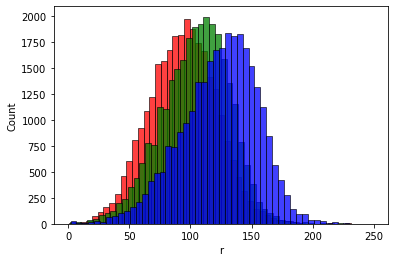

In [5]:
sns.histplot(data=df, x='r', bins=51, color='red')
sns.histplot(data=df, x='g', bins=51, color='green')
sns.histplot(data=df, x='b', bins=51, color='blue')

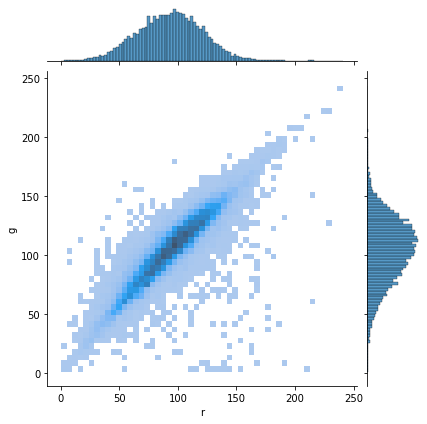

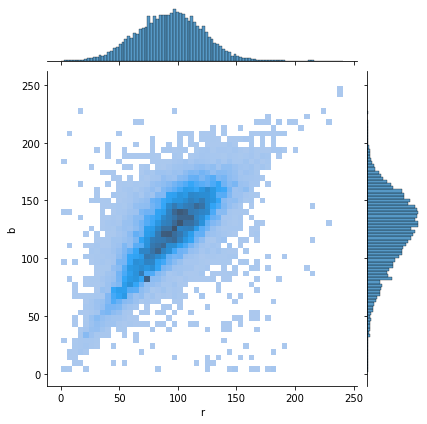

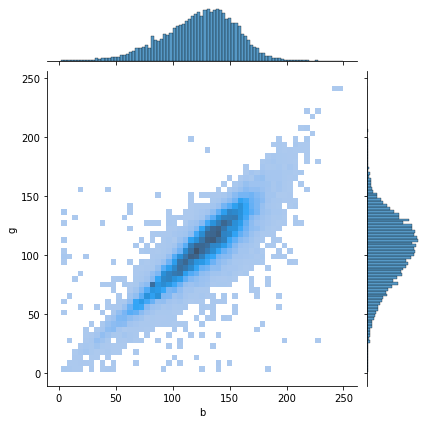

In [11]:
sns.jointplot(data=df, x='r', y='g', kind='hist', bins=51)
sns.jointplot(data=df, x='r', y='b', kind='hist', bins=51)
sns.jointplot(data=df, x='b', y='g', kind='hist', bins=51)

<AxesSubplot:ylabel='Count'>

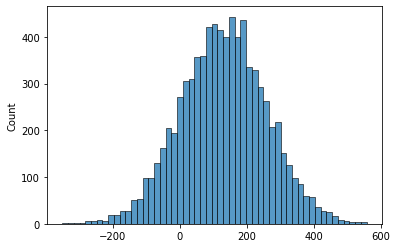

In [7]:
def mountain_flattener(array):
    median = np.median(array)
    new_array = []
    for x in array:
        if x == median:
            new_array.append(x)
        elif x < median:
            inv_proportion = 1 - ((median - x) / median)
            new_array.append((inv_proportion ** 5) * median)
        else:
            inv_proportion = 1 - (((x - median)) / (255 - median))
            new_array.append((inv_proportion ** 5) * (255 - median))
    return new_array

dist = np.random.normal(loc=128, scale=128, size=8000)
sns.histplot(data=dist)

In [8]:
values = df.values
new_colors = np.array([mountain_flattener(c) for c in values[:, 1:].transpose()])
files = df.values[:, 0]

new_values = np.concatenate((files.reshape(-1, 1), new_colors.transpose()), axis=1)

new_df = pd.DataFrame(new_values, columns=['file', 'r', 'g', 'b'])
new_df.head()

,file,r,g,b
0,kfv1gd.jpg,144.012457,94.481662,63.861386
1,kimvf8.jpg,90.812856,93.889699,94.012065
2,k5kyxm.jpg,99.735782,88.994742,73.679825
3,kdhtij.jpg,55.638382,52.769311,52.072191
4,knqmrh.jpg,152.046818,134.227993,69.573642


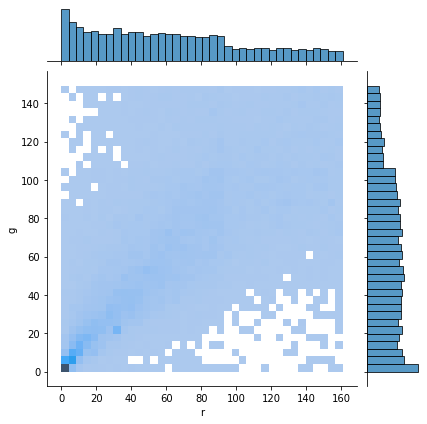

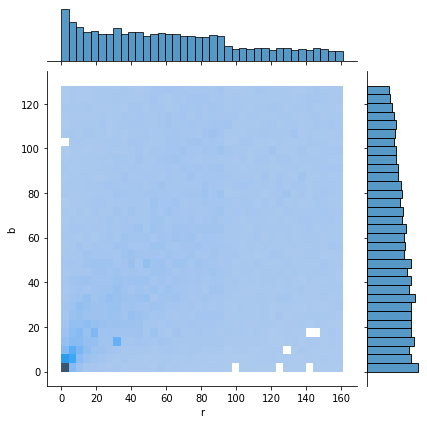

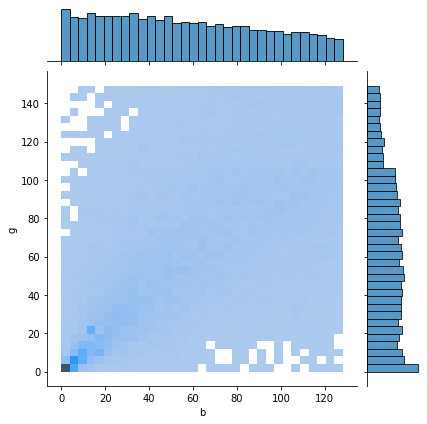

In [9]:
sns.jointplot(data=new_df, x='r', y='g', kind='hist')
sns.jointplot(data=new_df, x='r', y='b', kind='hist')
sns.jointplot(data=new_df, x='b', y='g', kind='hist')